# Sprint21 自然言語処理入門

## データセットの準備

In [2]:
import numpy as np
import pandas as pd

In [3]:
%pwd

'/Users/koyamasatoshi/GoogleDrive/diveintocode-ml'

In [4]:
%cd Data
%pwd

/Users/koyamasatoshi/GoogleDrive/diveintocode-ml/Data


'/Users/koyamasatoshi/GoogleDrive/diveintocode-ml/Data'

In [5]:
# 一度だけ実行：データをダウンロード
#!curl -o aclImdb_v1.tar.gz http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [6]:
# 一度だけ実行：tar.gzファイルを解凍
#!tar -xvf aclImdb_v1.tar.gz

In [7]:
# 一度だけ実行：train/unsup（ラベルなしデータ）を削除
#!rm -rf aclImdb/train/unsup

In [8]:
# データセットの説明を表示
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [9]:
%cd ..
%pwd

/Users/koyamasatoshi/GoogleDrive/diveintocode-ml


'/Users/koyamasatoshi/GoogleDrive/diveintocode-ml'

In [10]:
from sklearn.datasets import load_files
train_review = load_files("./Data/aclImdb/train/", encoding="utf-8")
X_train, y_train = train_review.data, train_review.target
test_review = load_files("./Data/aclImdb/test/", encoding="utf-8")
X_test, y_test = test_review.data, test_review.target
print(train_review.target_names)

['neg', 'pos']


In [11]:
unq, cnt = np.unique(y_train, return_counts=True)
print(unq)
print(cnt)

[0 1]
[12500 12500]


In [12]:
print("X : {}".format(X_train[0]))

X : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


### BoW (Bag of Words)

In [13]:
mini_dataset = [
    "This movie is very good.",
    "This film is a good",
    "Very bad. Very, very bad."
]
print(mini_dataset)

['This movie is very good.', 'This film is a good', 'Very bad. Very, very bad.']


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
print(bow)
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

[[0 0 0 1 1 1 1 1]
 [1 0 1 1 1 0 1 0]
 [0 2 0 0 0 0 0 3]]


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


### 前処理
CountVectorizerクラスでは大文字は小文字に揃えるという 前処理 が自動的に行われています。こういった前処理は自然言語処理において大切で、不要な記号などの消去（テキストクリーニング）や表記揺れの統一といったことを別途行うことが一般的です。


語形が「see」「saw」「seen」のように変化する単語に対して語幹に揃える ステミング と呼ばれる処理を行うこともあります。



### トークン
BoWは厳密には単語を数えているのではなく、 トークン（token） として定めた固まりを数えます。


何をトークンとするかはCountVectorizerでは引数token_patternで __正規表現__ の記法により指定されます。デフォルトは```r'(?u)\b\w\w+\b'```ですが、上の例では```r'(?u)\b\w+\b'```としています。


デフォルトでは空白・句読点・スラッシュなどに囲まれた2文字以上の文字を1つのトークンとして抜き出すようになっているため、「a」や「I」などがカウントされません。英語では1文字の単語は文章の特徴をあまり表さないため、除外されることもあります。しかし、上の例では1文字の単語もトークンとして抜き出すように引数を指定しています。


《正規表現》


正規表現は前処理の際にも活用しますが、ここでは詳細は扱いません。Pythonではreモジュールによって正規表現操作ができます。



### 形態素解析
英語などの多くの言語では空白という分かりやすい基準でトークン化が行えますが、日本語ではそれが行えません。


日本語では名詞や助詞、動詞のように異なる __品詞__ で分けられる単位で __分かち書き__ することになります。例えば「私はプログラミングを学びます」という日本語の文は「私/は/プログラミング/を/学び/ます」という風になります。


これには MeCab や Janome のような形態素解析ツールを用います。Pythonから利用することも可能です。MeCabをウェブ上で簡単に利用できるWeb茶まめというサービスも国立国語研究所が提供しています。


自然言語では新しい言葉も日々生まれますので、それにどれだけ対応できるかも大切です。MeCab用の毎週更新される辞書として mecab-ipadic-NEologd がオープンソースで存在しています。

### n-gram
上のBoWの例では1つの単語（トークン）毎の登場回数を数えましたが、これでは語順は全く考慮されていません。


考慮するために、隣あう単語同士をまとめて扱う n-gram という考え方を適用することがあります。2つの単語をまとめる場合は 2-gram (bigram) と呼び、次のようになります。

In [15]:
# ngram_rangeで利用するn_gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r"(?u)\b\w+\b")
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
print(bow_train)
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)


[[0 0 0 0 1 1 0 1 0 1 0]
 [1 0 1 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 2 0 1]]


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [16]:
# ngram_rangeで利用するn_gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r"(?u)\b\w+\b")
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
print(bow_train)
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)


[[0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0]
 [1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 3 2 0 1]]


,a,a good,bad,bad very,film,film is,good,is,is a,is very,movie,movie is,this,this film,this movie,very,very bad,very good,very very
0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0
1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0
2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,2,0,1


## 【問題１】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。



In [17]:
corpus = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

In [18]:
import re
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [19]:
class BagOfWords():
    def __init__(self, ngram_range=(1, 1), token_pattern=r"(?u)\b\w\w+\b"):
        self.min_n, self.max_n = ngram_range
        self.token_pattern = token_pattern
    
    def fit_transform(self, corpus):
        # 小文字にする
        for i in range(len(corpus)):
            corpus[i] = corpus[i].lower()
            print(corpus[i])
        
        # token一覧を取得して、self.feature_namesに保持
        self._get_token(corpus)
        
        # One-Hotベクトルを作成
        X = np.zeros((len(corpus), len(self.feature_names)), dtype=np.int)
        for i, text in enumerate(corpus):
            ngrams = self._get_ngrams(text)
            print(ngrams)
            for j, token in enumerate(self.feature_names):
                X[i, j] = ngrams.count(token)
        return X

    def _get_ngrams(self, text):
        """１つの文（text）から、ngramを作成する"""
        min_n = self.min_n
        max_n = self.max_n
        # text を単語 word のリストにする
        words = re.findall(self.token_pattern, text)

        # リストの要素を複数選択しながらngramを作成
        ngrams = []
        for n in range(min_n, min(max_n + 1, len(words) + 1)):
            for i in range(len(words) - n + 1):
                ngrams.append(" ".join(words[i:i+n]))
        return ngrams

    def _get_token(self, corpus):
        """入力全体（corpus）から語彙（vocabulary）を作成する"""
        feature_names = []
        # 正規表現でパターンの一覧を取得
        for text in corpus:
            ngrams = self._get_ngrams(text)
            feature_names.extend(ngrams)
        # 重複を削除してsortする
        feature_names = sorted(set(feature_names))
        self.feature_names = feature_names
    
    def get_feature_names(self):
        return self.feature_names
        

In [20]:
print("=====unigram=====")
vectorizer = BagOfWords(ngram_range=(1, 1), token_pattern=r"(?u)\b\w+\b")
bow_scratch = vectorizer.fit_transform(corpus)
df = pd.DataFrame(bow_scratch, columns=vectorizer.get_feature_names())
display(df)

print("=====bigram=====")
vectorizer = BagOfWords(ngram_range=(2, 2), token_pattern=r"(?u)\b\w+\b")
bow_scratch = vectorizer.fit_transform(corpus)
df = pd.DataFrame(bow_scratch, columns=vectorizer.get_feature_names())
display(df)

print("=====unigram & bigram=====")
vectorizer = BagOfWords(ngram_range=(1, 2), token_pattern=r"(?u)\b\w+\b")
bow_scratch = vectorizer.fit_transform(corpus)
df = pd.DataFrame(bow_scratch, columns=vectorizer.get_feature_names())
display(df)


=====unigram=====
this movie is soooo funny!!!
what a movie! i never
best movie ever!!!!! this movie
['this', 'movie', 'is', 'soooo', 'funny']
['what', 'a', 'movie', 'i', 'never']
['best', 'movie', 'ever', 'this', 'movie']


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


=====bigram=====
this movie is soooo funny!!!
what a movie! i never
best movie ever!!!!! this movie
['this movie', 'movie is', 'is soooo', 'soooo funny']
['what a', 'a movie', 'movie i', 'i never']
['best movie', 'movie ever', 'ever this', 'this movie']


,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


=====unigram & bigram=====
this movie is soooo funny!!!
what a movie! i never
best movie ever!!!!! this movie
['this', 'movie', 'is', 'soooo', 'funny', 'this movie', 'movie is', 'is soooo', 'soooo funny']
['what', 'a', 'movie', 'i', 'never', 'what a', 'a movie', 'movie i', 'i never']
['best', 'movie', 'ever', 'this', 'movie', 'best movie', 'movie ever', 'ever this', 'this movie']


,a,a movie,best,best movie,ever,ever this,funny,i,i never,is,is soooo,movie,movie ever,movie i,movie is,never,soooo,soooo funny,this,this movie,what,what a
0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0
1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,1
2,0,0,1,1,1,1,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0


## 【問題２】TF-IDFの計算


Term Frequency（ある単語の出現頻度）:



$n_{t,d}$ : サンプルd内のトークンtの出現回数（BoWと同じ）


$\sum_{s \in d}n_{s,d}$ : サンプルdの全トークンの出現回数の和


Inverse Document Frequency（ある単語のドキュメント内出現頻度の逆数）:

$$idf_t = \log \frac{N}{df_t}$$

$N$ : サンプル数


$df(t)$ : トークンtが出現するサンプル数

対数の底は何でも良い。対数を取って、ほとんどの文書で出現する単語の影響を小さくするのが目的だと思われる。




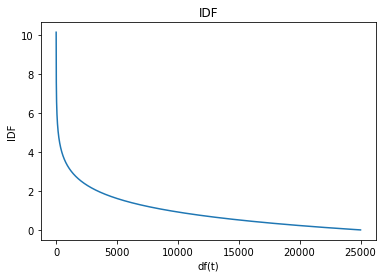

In [21]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

### ストップワード
あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを ストップワード と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします。


scikit-learnのCountVectorizerでは引数stop_wordsにリストで指定することで処理を行なってくれます。

In [22]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


代表的な既存のストップワード一覧としては、NLTK という自然言語処理のライブラリのものがあげられます。あるデータセットにおいては特別重要な意味を持つ単語が一覧に含まれている可能性もあるため、使用する際は中身を確認することが望ましいです。

In [23]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koyamasatoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


逆に、登場回数が特に少ないトークンも取り除くことが多いです。全てのトークンを用いるとベクトルの次元数が著しく大きくなってしまい計算コストが高まるためです。


scikit-learnのCountVectorizerでは引数max_featuresに最大の語彙数を指定することで処理を行なってくれます。以下の例では出現数が多い順に5個でベクトル化しています。

In [24]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation
sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation


なお、scikit-learnでは標準的な式とは異なる式が採用されています。


また、デフォルトではnorm="l2"の引数が設定されており、各サンプルにL2正規化が行われます。norm=Noneとすることで正規化は行われなくなります。

In [25]:
print("x_train", type(X_train), len(X_train))
print("x_test", type(X_test), len(X_test))

x_train <class 'list'> 25000
x_test <class 'list'> 25000


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
print("Non Params")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_train).toarray()
cols = vectorizer.get_feature_names()
print(len(cols))
df = pd.DataFrame(X, columns=cols)
display(df)

Non Params
74849


,00,000,0000000000001,00001,00015,000s,001,003830,006,007,0079,0080,0083,0093638,00am,00pm,00s,01,01pm,02,020410,029,03,04,041,05,050,06,06th,07,08,087,089,08th,09,0f,0ne,0r,0s,10,100,1000,1000000,10000000000000,1000lb,1000s,1001,100b,100k,100m,...,zuniga,zunz,zurich,zuzz,zvezda,zvonimir,zvyagvatsev,zwartboek,zwick,zwrite,zx81,zy,zyada,zyuranger,zz,zzzz,zzzzz,zzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zé,álex,álvaro,ánd,ángel,ángela,âme,är,ääliöt,äänekoski,åge,åmål,æsthetic,écran,élan,émigré,émigrés,était,état,étc,évery,êxtase,ís,ísnt,østbye,über,üvegtigris
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.102831,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066417,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060992,0.0,0.0,0.074326,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.036529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [27]:
print("stop word = NLTK")
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(X_train).toarray()
cols = vectorizer.get_feature_names()
print(len(cols))
df = pd.DataFrame(X, columns=cols)
display(df)

stop word = NLTK
74704


,00,000,0000000000001,00001,00015,000s,001,003830,006,007,0079,0080,0083,0093638,00am,00pm,00s,01,01pm,02,020410,029,03,04,041,05,050,06,06th,07,08,087,089,08th,09,0f,0ne,0r,0s,10,100,1000,1000000,10000000000000,1000lb,1000s,1001,100b,100k,100m,...,zuniga,zunz,zurich,zuzz,zvezda,zvonimir,zvyagvatsev,zwartboek,zwick,zwrite,zx81,zy,zyada,zyuranger,zz,zzzz,zzzzz,zzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zé,álex,álvaro,ánd,ángel,ángela,âme,är,ääliöt,äänekoski,åge,åmål,æsthetic,écran,élan,émigré,émigrés,était,état,étc,évery,êxtase,ís,ísnt,østbye,über,üvegtigris
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.117075,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.075048,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065442,0.0,0.0,0.079749,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.039194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [28]:
print("stop word = NLTK & max_features = 5000")
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X = vectorizer.fit_transform(X_train).toarray()
cols = vectorizer.get_feature_names()
print(len(cols))
df = pd.DataFrame(X, columns=cols)
display(df)
df.describe()

stop word = NLTK & max_features = 5000
5000


,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,1st,20,2000,2001,2002,2003,2004,2005,2006,2007,2008,20th,...,workers,working,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.080747,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.054256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.164505,0.0,0.0,0.136932,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.080675,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.103928,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.127480,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.085006,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.089572,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.104143,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.000000,0.052665,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.430351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.065417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.039423,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.0,0.0,0.0,0.0,0.0,0.000000,0.096481,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.

,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,1st,20,2000,2001,2002,2003,2004,2005,2006,2007,2008,20th,...,workers,working,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,zero,zizek,zombie,zombies,zone
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.000457,0.001030,0.010904,0.001746,0.001444,0.001347,0.001124,0.000437,0.000905,0.002013,0.000681,0.000815,0.000624,0.000488,0.000486,0.000356,0.000436,0.000731,0.000627,0.000488,0.000416,0.000391,0.000753,0.000546,0.000358,0.000454,0.000353,0.000779,0.000527,0.000432,0.000382,0.000380,0.000576,0.000395,0.000332,0.000468,0.000353,0.000458,0.000678,0.002472,0.000745,0.000708,0.000587,0.000478,0.000497,0.000577,0.000633,0.000471,0.000357,0.000540,...,0.000702,0.002394,0.003609,0.008566,0.000610,0.000422,0.000487,0.000630,0.004790,0.008323,0.006844,0.000589,0.000912,0.001409,0.020027,0.000392,0.000319,0.001810,0.000440,0.000422,0.000537,0.000471,0.002425,0.003586,0.002281,0.000460,0.004121,0.004641,0.005115,0.002027,0.000776,0.000509,0.000384,0.001762,0.006035,0.009781,0.000423,0.000467,0.004530,0.000586,0.006427,0.002511,0.008323,0.001792,0.001120,0.001591,0.000280,0.002486,0.001893,0.000666
std,0.008945,0.012530,0.033062,0.015954,0.016369,0.013366,0.012925,0.008221,0.011499,0.015937,0.010064,0.010903,0.009503,0.008599,0.008243,0.008258,0.008817,0.009812,0.009870,0.008491,0.007677,0.007935,0.010923,0.008511,0.007800,0.009102,0.006981,0.010970,0.008960,0.008094,0.007864,0.008032,0.009084,0.007792,0.006593,0.008214,0.007040,0.008069,0.010976,0.016980,0.010751,0.010164,0.009132,0.008364,0.008076,0.009209,0.009403,0.008479,0.007321,0.009080,...,0.010704,0.015113,0.018538,0.027976,0.009399,0.007835,0.007999,0.009118,0.023795,0.030200,0.025354,0.009559,0.011739,0.013031,0.035664,0.007255,0.006418,0.016371,0.008108,0.007741,0.008586,0.011430,0.016624,0.019634,0.016145,0.008860,0.020840,0.020774,0.022108,0.015097,0.012179,0.009637,0.007738,0.014682,0.023947,0.027330,0.008384,0.009674,0.021886,0.009309,0.023157,0.018308,0.027949,0.014737,0.012405,0.016011,0.012803,0.026012,0.022070,0.010984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [29]:
print("stop word = NLTK & max_features = 5000, norm = None")
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000, norm=None)
X_nonorm = vectorizer.fit_transform(X_train).toarray()
cols_nonorm = vectorizer.get_feature_names()
print(len(cols_nonorm))
df_nonorm = pd.DataFrame(X_nonorm, columns=cols_nonorm)
display(df_nonorm)
df_nonorm.describe()

stop word = NLTK & max_features = 5000, norm = None
5000


,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,1st,20,2000,2001,2002,2003,2004,2005,2006,2007,2008,20th,...,workers,working,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,3.159738,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,2.123109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6.437303,0.0,0.0,5.35835,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,3.159738,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.070496,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,2.998676,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,2.998676,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,3.159738,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5.869176,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.000000,5.127735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,41.901218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,6.369327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3.838427,0.0,0.0,0.0,0.0,0.0,0.0,3.554168,0.0,0.0,0.0,0.0,0.0,0.000000,9.393903,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,

,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,1st,20,2000,2001,2002,2003,2004,2005,2006,2007,2008,20th,...,workers,working,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,zero,zizek,zombie,zombies,zone
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.024998,0.068742,0.521890,0.094350,0.081386,0.071451,0.059347,0.022890,0.049066,0.103200,0.035586,0.042572,0.038775,0.028304,0.029989,0.023744,0.026736,0.043920,0.039057,0.027390,0.024554,0.025232,0.040121,0.033605,0.022194,0.025934,0.024101,0.042075,0.033254,0.025001,0.022879,0.022563,0.034055,0.022291,0.022062,0.027955,0.022519,0.027349,0.035594,0.130165,0.040566,0.039430,0.033003,0.030248,0.030163,0.035182,0.040728,0.028874,0.022423,0.031316,...,0.040964,0.143257,0.208734,0.484704,0.036027,0.023487,0.029949,0.035091,0.233720,0.371322,0.317214,0.032034,0.044302,0.076333,1.056119,0.024917,0.022747,0.089041,0.023220,0.024428,0.032375,0.027892,0.125663,0.194209,0.125376,0.024959,0.212317,0.248116,0.273540,0.111228,0.039226,0.027212,0.022334,0.093648,0.335513,0.528189,0.024685,0.028193,0.241995,0.029652,0.374303,0.152181,0.471211,0.100817,0.061701,0.082304,0.028623,0.157696,0.115487,0.036530
std,0.466848,0.821733,1.573551,0.887893,0.959142,0.686108,0.645928,0.414379,0.586052,0.767683,0.501104,0.524998,0.578985,0.482429,0.479269,0.556439,0.540715,0.579518,0.614590,0.445307,0.433785,0.515961,0.542823,0.520661,0.460006,0.471929,0.470379,0.555109,0.607762,0.440367,0.451099,0.431376,0.504948,0.433526,0.419174,0.468358,0.421910,0.444627,0.581459,0.902351,0.561142,0.530909,0.478541,0.487892,0.456278,0.534895,0.589204,0.500670,0.465135,0.496092,...,0.615585,0.842804,1.017761,1.581001,0.540617,0.408473,0.455128,0.470819,1.089804,1.307110,1.097022,0.494577,0.537117,0.659075,1.925961,0.426701,0.427574,0.746405,0.401895,0.423308,0.529176,0.661360,0.810016,1.023835,0.844063,0.431525,1.023322,1.056402,1.136277,0.787628,0.604330,0.477348,0.430080,0.740267,1.296243,1.432756,0.456263,0.594078,1.119999,0.445442,1.331106,1.110633,1.598529,0.799784,0.640521,0.853393,1.755241,2.065630,1.482791,0.552200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## 【問題３】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [28]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import tensorflow as tf
from datetime import datetime as dt
from tensorflow.keras import layers
from keras import backend as K
from sklearn.model_selection import train_test_split
tf.__version__

Using TensorFlow backend.


'1.14.0'

#### max_features = 5000, stop_words = NLTK

In [29]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bin_y_train.shape)
print("y_valid", bin_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 5000) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [47]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.3362 - acc: 0.8576 - val_loss: 0.3089 - val_acc: 0.8706
Epoch 2/10
20000/20000 [==============================] - 71s 4ms/sample - los

In [48]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.0009143556006200924
Accuracy: 0.99975

=====Validation=====
Loss: 1.1027118696564808
Accuracy: 0.8674

=====Test=====
Test loss: 1.1934136017379164
Test accuracy: 0.8518


#### max_features = 1000, stop_words = NLTK

In [151]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 1000) (25000,)
X_train (20000, 1000)
X_valid (5000, 1000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 1000)
y_test (25000,)


In [152]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               500500    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 525,601
Trainable params: 525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 937us/sample - loss: 0.3784 - acc: 0.8321 - val_loss: 0.3618 - val_acc: 0.8404
Epoch 2/10
20000/20000 [==============================] - 19s 973us/sample - loss: 0.3127 - acc: 0.8655 - val_loss: 0.3592 - val_acc: 0.8474
Epoch 3/10
20000/20000 [==============================] - 2

In [153]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.0033348837629237097
Accuracy: 0.99915

=====Validation=====
Loss: 1.0326416699886323
Accuracy: 0.8352

=====Test=====
Test loss: 0.9832632360088825
Test accuracy: 0.84052


#### max_features = 25000, stop_words = NLTK

In [154]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=25000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 25000) (25000,)
X_train (20000, 25000)
X_valid (5000, 25000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 25000)
y_test (25000,)


In [155]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               12500500  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 12,525,601
Trainable params: 12,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 241s 12ms/sample - loss: 0.3261 - acc: 0.8625 - val_loss: 0.2955 - val_acc: 0.8834
Epoch 2/10
20000/20000 [==============================] - 246s 12ms/sample - loss: 0.1065 - acc: 0.9599 - val_loss: 0.4011 - val_acc: 0.8836
Epoch 3/10
20000/20000 [=============================

In [156]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.0013372057583596643
Accuracy: 0.99965

=====Validation=====
Loss: 1.0240648747086525
Accuracy: 0.8686

=====Test=====
Test loss: 1.1746592595960945
Test accuracy: 0.84508


max_featuresが少ないと、スコアは低下する。

#### ngram_range = (2, 2)

In [157]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words, max_features=5000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 5000) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [158]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.4637 - acc: 0.7746 - val_loss: 0.4295 - val_acc: 0.7946
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.3003 - acc: 0.8644 - val_loss: 0.4749 - val_acc: 0.7962
Epoch 3/10
20000/20000 [==============================] - 5

In [159]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.004390725679078003
Accuracy: 0.9987

=====Validation=====
Loss: 2.1635738880048447
Accuracy: 0.7976

=====Test=====
Test loss: 2.3413670416069032
Test accuracy: 0.78244


#### ngram_range = (3, 3)

In [160]:
vectorizer = TfidfVectorizer(ngram_range=(3, 3), stop_words=stop_words, max_features=5000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 5000) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [161]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.6182 - acc: 0.6360 - val_loss: 0.5652 - val_acc: 0.7006
Epoch 2/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.4817 - acc: 0.7461 - val_loss: 0.5603 - val_acc: 0.7004
Epoch 3/10
20000/20000 [==============================] - 5

In [162]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.1749103534281254
Accuracy: 0.88485

=====Validation=====
Loss: 1.434112735080719
Accuracy: 0.6856

=====Test=====
Test loss: 1.508461694831848
Test accuracy: 0.6568


#### ngram_range = (1, 3)

In [163]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words, max_features=5000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 5000) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [164]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 56s 3ms/sample - loss: 0.3367 - acc: 0.8550 - val_loss: 0.3206 - val_acc: 0.8572
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/sample - loss: 0.1937 - acc: 0.9261 - val_loss: 0.3366 - val_acc: 0.8660
Epoch 3/10
20000/20000 [==============================] - 5

In [165]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.0017240159534195414
Accuracy: 0.99985

=====Validation=====
Loss: 1.2642580055195838
Accuracy: 0.866

=====Test=====
Test loss: 1.3220932640037686
Test accuracy: 0.85828


ngram_rangeは増やしただけでは微妙だが、1~複数を組み合わせると良い結果になった。

#### StopWord = なし

In [146]:
vectorizer = TfidfVectorizer(max_features=5000)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)

all (25000, 5000) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [147]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.3314 - acc: 0.8609 - val_loss: 0.2992 - val_acc: 0.8758
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.1970 - acc: 0.9216 - val_loss: 0.3507 - val_acc: 0.8712
Epoch 3/10
20000/20000 [==============================] - 5

In [148]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.002487527912069686
Accuracy: 0.99925

=====Validation=====
Loss: 1.0921694380663336
Accuracy: 0.8676

=====Test=====
Test loss: 1.181565614219401
Test accuracy: 0.85396


#### StopWord = NLTK + 数字から始まる語を削除する。

In [175]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5074)
vec_X = vectorizer.fit_transform(X_train).toarray()
print("all", vec_X.shape, y_train.shape)
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(vec_X, y_train, train_size=0.8, stratify=y_train, random_state=0)
vec_X_train = vec_X_train[:, 74:]
vec_X_valid = vec_X_valid[:, 74:]
print("X_train", vec_X_train.shape)
print("X_valid", vec_X_valid.shape)
print("y_train", bi_y_train.shape)
print("y_valid", bi_y_valid.shape)
vec_X_test = vectorizer.transform(X_test).toarray()
bin_y_test = y_test
vec_X_test = vec_X_test[:, 74:]
print("X_test", vec_X_test.shape)
print("y_test", bin_y_test.shape)


all (25000, 5074) (25000,)
X_train (20000, 5000)
X_valid (5000, 5000)
y_train (20000,)
y_valid (5000,)
X_test (25000, 5000)
y_test (25000,)


In [172]:
vectorizer.get_feature_names()[:74]

['00',
 '000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '13th',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1930',
 '1930s',
 '1933',
 '1936',
 '1940',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1968',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1980',
 '1980s',
 '1983',
 '1984',
 '1987',
 '1990',
 '1993',
 '1995',
 '1996',
 '1997',
 '1999',
 '1st',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '20th',
 '22',
 '24',
 '25',
 '2nd',
 '30',
 '3000',
 '30s',
 '35',
 '3d',
 '3rd',
 '40',
 '45',
 '50',
 '50s',
 '60',
 '60s',
 '70',
 '70s',
 '80',
 '80s',
 '90',
 '90s',
 '99']

In [176]:
K.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu", input_shape=(vec_X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,525,601
Trainable params: 2,525,601
Non-trainable params: 0
_________________________________________________________________
Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 53s 3ms/sample - loss: 0.3398 - acc: 0.8549 - val_loss: 0.3147 - val_acc: 0.8714
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.1990 - acc: 0.9188 - val_loss: 0.3779 - val_acc: 0.8628
Epoch 3/10
20000/20000 [==============================] - 5

In [177]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

print("\n=====Test=====")
score_test = model.evaluate(vec_X_test, bin_y_test, verbose=False)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

=====Train=====
Loss: 0.004407254277550714
Accuracy: 0.99915

=====Validation=====
Loss: 1.2759433449700475
Accuracy: 0.8634

=====Test=====
Test loss: 1.3878899579416215
Test accuracy: 0.85352


全体的に、epochが進んでもvalidationのスコアは上がらなかった。1 epochで過学習？


## 【問題４】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

This movie is SOOOO funny!!!   

What a movie! I never  

best movie ever!!!!! this movie  


In [31]:
class ScratchTFIDF():
    def __init__(self, ngram_range=(1, 1), token_pattern=r"(?u)\b\w\w+\b", smooth_idf=True):
        self.min_n, self.max_n = ngram_range
        self.token_pattern = token_pattern
        self.smooth_idf = smooth_idf
    
    def fit_transform(self, corpus):
        # 小文字にする
        for i in range(len(corpus)):
            corpus[i] = corpus[i].lower()
            #print(corpus[i])
        
        # token一覧を取得して、self.feature_namesに保持
        self._get_token(corpus)
        
        # 出現回数のOne-Hotベクトルを作成
        X = np.zeros((len(corpus), len(self.feature_names)), dtype=np.int)
        for i, text in enumerate(corpus):
            ngrams = self._get_ngrams(text)
            #print(ngrams)
            for j, token in enumerate(self.feature_names):
                X[i, j] = ngrams.count(token)

        # TextFrequency (出現回数/出現総数)
        TF = X / np.sum(X, axis=0, keepdims=True)

        # Inverse Document Frequency (IDF)
        N = len(corpus)
        df = np.sum(X > 0, axis=0, keepdims=True)  # トークンが出現するtext数
        if self.smooth_idf:
            IDF = np.log((N + 1) / (df + 1)) + 1
        else:
            IDF = np.log(N / df) + 1
        
        # TF-IDF = TF * IDF
        TFIDF = TF * IDF
        return TFIDF

    def _get_ngrams(self, sentence):
        """１つの文（sentence）から、ngramを作成する"""
        min_n = self.min_n
        max_n = self.max_n
        # text を単語 word のリストにする
        words = re.findall(self.token_pattern, sentence)

        # リストの要素を複数選択しながらngramを作成
        ngrams = []
        for n in range(min_n, min(max_n + 1, len(words) + 1)):
            for i in range(len(words) - n + 1):
                ngrams.append(" ".join(words[i:i+n]))
        return ngrams

    def _get_token(self, corpus):
        """コーパスから、feature_names（語彙）を作成する"""
        feature_names = []
        # 正規表現でパターンの一覧を取得
        for text in corpus:
            ngrams = self._get_ngrams(text)
            feature_names.extend(ngrams)
        # 重複を削除してsortする
        feature_names = sorted(set(feature_names))
        self.feature_names = feature_names
    
    def get_feature_names(self):
        return self.feature_names
       
print("=====idf v1")
print("scratch")
vectorizer = ScratchTFIDF(ngram_range=(1, 1), token_pattern=r"(?u)\b\w+\b")
tfidf_scratch = vectorizer.fit_transform(corpus)
df = pd.DataFrame(tfidf_scratch, columns=vectorizer.get_feature_names())
display(df)

print("sklearn")
vectorizer = TfidfVectorizer(norm=None, token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus).toarray()
cols = vectorizer.get_feature_names()
df = pd.DataFrame(X, columns=cols)
display(df)

print("=====idf v2")
print("scratch")
vectorizer = ScratchTFIDF(ngram_range=(1, 1), token_pattern=r"(?u)\b\w+\b", smooth_idf=False)
tfidf_scratch = vectorizer.fit_transform(corpus)
df = pd.DataFrame(tfidf_scratch, columns=vectorizer.get_feature_names())
display(df)

print("sklearn")
vectorizer = TfidfVectorizer(norm=None, token_pattern=r"(?u)\b\w+\b", smooth_idf=False)
X = vectorizer.fit_transform(corpus).toarray()
cols = vectorizer.get_feature_names()
df = pd.DataFrame(X, columns=cols)
display(df)

=====idf v1
scratch


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,0.25,0.000000,1.693147,0.643841,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,0.25,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.643841,0.000000


sklearn


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


=====idf v2
scratch


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.25,0.000000,2.098612,0.702733,0.000000
1,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,0.25,2.098612,0.000000,0.000000,2.098612
2,0.000000,2.098612,2.098612,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.702733,0.000000


sklearn


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,1.0,0.000000,2.098612,1.405465,0.000000
1,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,1.0,2.098612,0.000000,0.000000,2.098612
2,0.000000,2.098612,2.098612,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.405465,0.000000


## Word2Vec
ニューラルネットワークを用いてベクトル化を行う手法が Word2Vec です。

#### CBow  
CBoW (Continuous Bag-of-Words) によるWord2Vecではある単語とある単語の間に来る単語を推定できるように全結合層2層のニューラルネットワークを学習します。  
ウィンドウサイズ = 推定する単語の前後いくつを入力として与えるかという大きさ

#### Skip-gram
CBoWとは逆にある単語の前後の単語を推定できるように全結合層2層のニューラルネットワークを学習する方法が Skip-gram です。学習を行なった後は入力側の重みを取り出し各語彙を表すベクトルとします。現在一般的に使われているのはCBoWよりもSki-gramです。


Pythonでは Gensim ライブラリを用いて扱うことができます。


In [30]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.00320267 -0.03818289 -0.02273145  0.00848797  0.00054937  0.01542566
  0.04925103 -0.00905616 -0.02683169 -0.04306099]
movieのベクトル : 
[-0.01697339  0.00074188  0.04843543 -0.0193329   0.01324117  0.00776101
  0.01818875  0.0288364  -0.01177051 -0.01948914]
isのベクトル : 
[-0.00118939  0.00854891 -0.01637472 -0.03253905  0.01939182  0.04365553
  0.02085635 -0.00693854  0.04417595 -0.01629864]
veryのベクトル : 
[-0.01923212 -0.01516518  0.01566378 -0.01193536 -0.03667028  0.01555535
  0.00958418 -0.01995935  0.00640871  0.02240297]
goodのベクトル : 
[-0.03021784 -0.03621498 -0.00846984  0.00862889 -0.04331264 -0.04596917
 -0.02069092 -0.0282926   0.03887006 -0.02934732]
filmのベクトル : 
[ 0.03746026  0.04919936  0.03467948  0.04750868 -0.0171279   0.03258874
 -0.00061661  0.0131375   0.03218419  0.04602466]
aのベクトル : 
[ 3.2407034e-02  4.5190439e-02 -3.8091781e-05  3.1409662e-02
 -4.3235132e-03 -1.9141145e-02  1.6

#### 単語の距離
ベクトル間で計算を行うことで、ある単語に似たベクトルを持つ単語を見つけることができます。例えばgoodに似たベクトルの単語を3つ探します。

In [31]:
model.wv.most_similar(positive="good", topn=3)

[('very', 0.2879248857498169),
 ('a', 0.11826697736978531),
 ('this', 0.032295167446136475)]

#### 可視化
2次元に圧縮することで単語ごとの位置関係を可視化することができます。以下はt-SNEを用いた例です。

/Users/koyamasatoshi/.pyenv/versions/anaconda3-2019.10/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 8 samples in 0.000s...
[t-SNE] Computed neighbors for 8 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 8 / 8
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.631092
[t-SNE] KL divergence after 2500 iterations: 0.199479


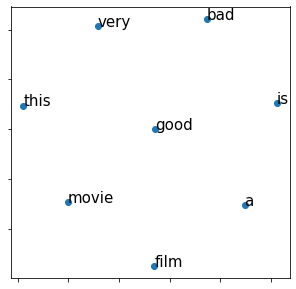

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca",
                  n_iter=5000, random_state=23, verbose=True)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=15)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


## 【問題５】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [144]:
import copy
s = 38

print(X_train[s])
prc_X_train = copy.deepcopy(X_train)

regex_special = re.compile('[!"#$%&\'\\\\()*+,-./:;<=>?@[\\]^_`{|}~「」〔〕“”〈〉『』【】＆＊・（）＄＃＠。、？！｀＋￥％]')
regex_url = re.compile(r"http?://\S*\s")
regex_tag = re.compile(r"<br /><br />")

for i in range(len(prc_X_train)):
    # 小文字にする
    prc_X_train[i] = prc_X_train[i].lower()
    # tagを削除
    prc_X_train[i] = regex_tag.sub(" ", prc_X_train[i])
    # URLを削除
    prc_X_train[i] = regex_url.sub("", prc_X_train[i])
    # 特殊文字を削除
    prc_X_train[i] = regex_special.sub("", prc_X_train[i])
    # 単語ごとにリストで分割
    prc_X_train[i] = re.findall(r"(?u)\b\w+\b", prc_X_train[i])

print()
print(prc_X_train[s])

I don't hand out "ones" often, but if there was ever a film that deserved this sort of attention, it's "Gas!" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version of M*A*S*H with a similar plot (in the movie "Whiffs" - look it up here in IMDb, http://www.imdb.com/title/tt0073891/ for more information).<br /><br />Marmorstein and Gould got closer to the brass ring with "Whiffs" than Corman did with "Gas!" but didn't quite get there. Neither one of those films even got close to the success of M*A*S*H.<br /><br />What's wrong with "Gas!"? What isn't? No one comes close to really acting at a level above junior high school theatrics. The production values stink. Someone else here mentioned the magically regenerating headlights on a getaway car, and there's more 

## 【問題６】Word2Vecの学習

In [215]:
from gensim.models import word2vec

%time trained_w2v = word2vec.Word2Vec(prc_X_train, size=100, window=5, min_count=0)
trained_w2v.save("Sprint21/imdb.model")

CPU times: user 1min 4s, sys: 839 ms, total: 1min 5s
Wall time: 34 s


/Users/koyamasatoshi/.pyenv/versions/anaconda3-2019.10/envs/py37/lib/python3.7/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [216]:
trained_w2v = word2vec.Word2Vec.load("Sprint21/imdb.model")

## 【問題７】ベクトルの可視化

In [51]:
vocabs = trained_w2v.wv.vocab.keys()
print(len(vocabs))
tsne_model = TSNE(perplexity=50, n_components=2, init="pca", n_iter=5000, random_state=23, verbose=True)
%time vectors_tsne = tsne_model.fit_transform(trained_w2v[vocabs])

30677
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 30677 samples in 0.160s...


/Users/koyamasatoshi/.pyenv/versions/anaconda3-2019.10/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[t-SNE] Computed neighbors for 30677 samples in 222.591s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30677
[t-SNE] Computed conditional probabilities for sample 2000 / 30677
[t-SNE] Computed conditional probabilities for sample 3000 / 30677
[t-SNE] Computed conditional probabilities for sample 4000 / 30677
[t-SNE] Computed conditional probabilities for sample 5000 / 30677
[t-SNE] Computed conditional probabilities for sample 6000 / 30677
[t-SNE] Computed conditional probabilities for sample 7000 / 30677
[t-SNE] Computed conditional probabilities for sample 8000 / 30677
[t-SNE] Computed conditional probabilities for sample 9000 / 30677
[t-SNE] Computed conditional probabilities for sample 10000 / 30677
[t-SNE] Computed conditional probabilities for sample 11000 / 30677
[t-SNE] Computed conditional probabilities for sample 12000 / 30677
[t-SNE] Computed conditional probabilities for sample 13000 / 30677
[t-SNE] Computed conditional probabilities for sample 14000 / 306

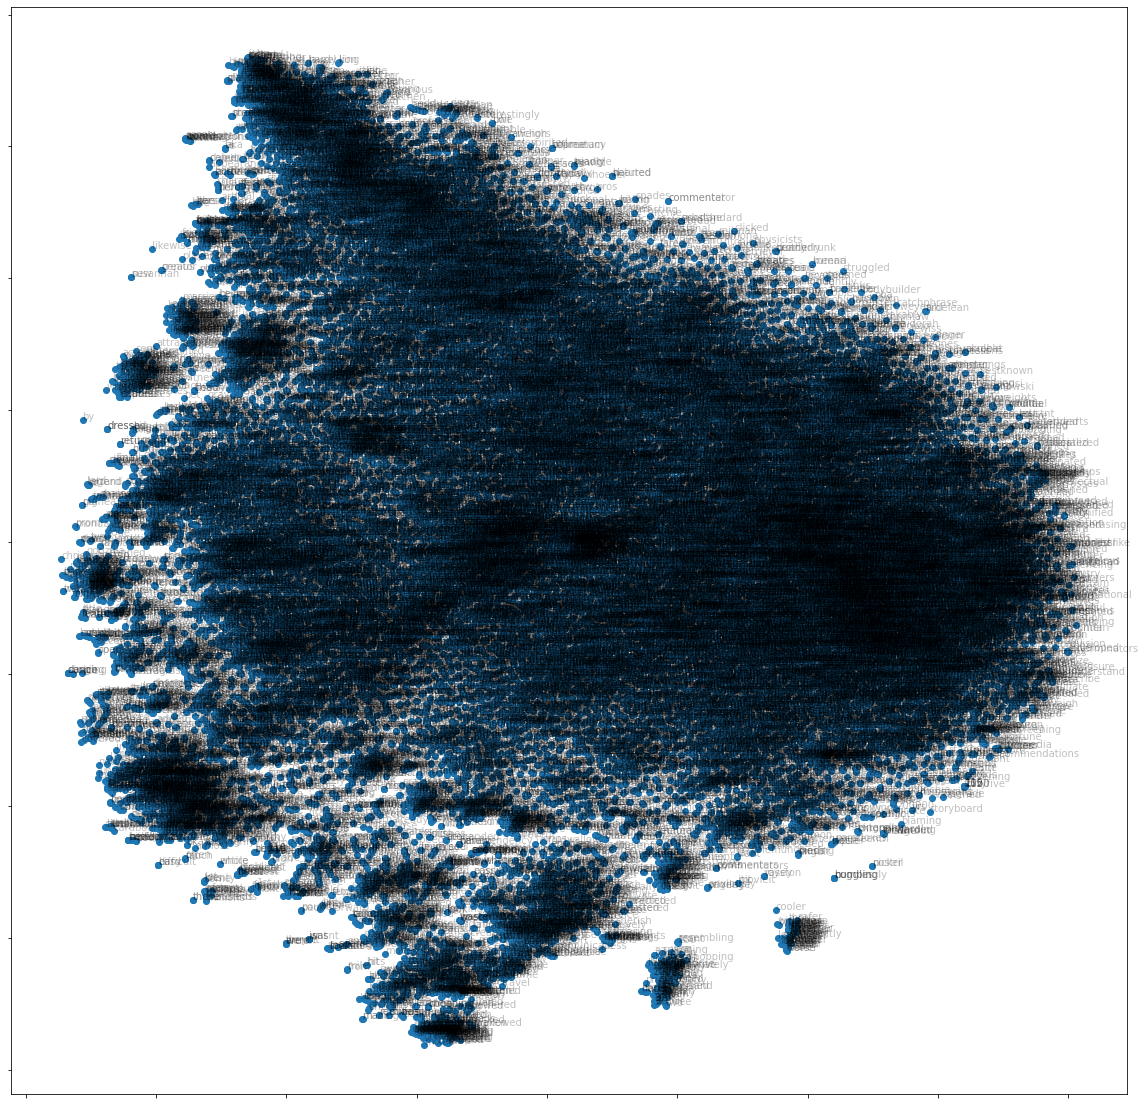

In [52]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=10, alpha=0.25)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


In [191]:
# 類義語を表示
word = "movie"
print(word)
results = trained_w2v.wv.most_similar(positive=[word])
for result in results:
    print(result)
print()

word = "story"
print(word)
results = trained_w2v.wv.most_similar(positive=[word])
for result in results:
    print(result)
print()

word = "action"
print(word)
results = trained_w2v.wv.most_similar(positive=[word])
for result in results:
    print(result)
print()

word = "romance"
print(word)
results = trained_w2v.wv.most_similar(positive=[word])
for result in results:
    print(result)
print()
word = "horror"
print(word)
results = trained_w2v.wv.most_similar(positive=[word])
for result in results:
    print(result)

movie
('film', 0.9352573752403259)
('flick', 0.7306014895439148)
('show', 0.6891927123069763)
('it', 0.6602274775505066)
('sequel', 0.6520806550979614)
('documentary', 0.6458179950714111)
('picture', 0.6391807794570923)
('episode', 0.6339723467826843)
('mess', 0.6088147163391113)
('movies', 0.6074621081352234)

story
('plot', 0.7870839238166809)
('storyline', 0.7786025404930115)
('premise', 0.6947821974754333)
('tale', 0.6915076375007629)
('concept', 0.6809759736061096)
('stories', 0.6381053328514099)
('narrative', 0.6329413652420044)
('script', 0.6097459197044373)
('drama', 0.5753564238548279)
('truth', 0.5629013180732727)

action
('suspense', 0.7193315029144287)
('gore', 0.6558676362037659)
('slasher', 0.6406298875808716)
('exciting', 0.6342660188674927)
('horror', 0.6182621717453003)
('adventure', 0.6116345524787903)
('thrills', 0.6010695099830627)
('climax', 0.593248724937439)
('unintentional', 0.586159884929657)
('finale', 0.5713618993759155)

romance
('romantic', 0.78184729814529

In [217]:
# 単語のvectorを表示
print(trained_w2v.wv)
print(trained_w2v.wv["boy"])
print("size = ", trained_w2v.wv["a"].shape[0])

[ 0.15659791  1.9007919  -1.5393473  -1.0254849   1.7254912  -0.42000195
 -1.5739137   0.70653796 -0.49863178 -0.71050036  0.71077764  1.7034156
  0.3870689   1.82238    -1.5765204   0.42891693 -0.3275239  -0.84934247
 -0.06107885  0.49410328 -0.84410703 -2.4866915   0.5440987  -2.394531
 -0.17346944  0.34617475 -2.2394915   0.5618926   0.5975016   0.13706413
  0.8643327   0.86103684 -1.7040879   0.52154934  0.7319697  -1.4673135
 -0.65713733  0.6015655  -0.14280863  1.0632546   1.1459792  -1.5822345
  0.895591   -3.209729    0.6748721  -1.8323659  -0.2520086   0.43270096
 -0.10866958 -0.586138    2.1143093   0.68035865 -0.51067126  0.4805269
  0.6890915  -0.6692268  -1.04085    -1.230004    1.612265   -1.6016086
  1.3407199   1.1440619  -0.3196484   0.48945653  0.5803796  -0.49425977
 -0.02902385  0.74533314  0.14900564 -2.1853848   0.92420053  0.1062683
 -0.38112208  0.10877035 -2.6464574   1.592939    0.330149    1.786714
  1.8482859   0.9088666  -1.9775232   0.48658547  0.30433792 

## 【問題８】Word2Vecを用いた映画レビューの分類
__メモ__  
Word2Vecの重みは用意した。  
次は何をすれば、、、
prc_X_trainをtokenにする？

In [218]:
length = np.zeros(len(prc_X_train))
for i in range(len(prc_X_train)):
    length[i] = len(prc_X_train[i])

print("レビューの数", len(prc_X_train))
print("ラベルの数", len(y_train))
print("レビュー文の長さ [words]")
print("min", np.min(length))
print("max", np.max(length))
print("mean", np.mean(length))
print(prc_X_train[0])


レビューの数 25000
ラベルの数 25000
レビュー文の長さ [words]
min 10.0
max 2459.0
mean 230.54892
['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'what', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'two', 'humans', 'who', 'have', 'decided', 'to', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'to', 'define', 'their', 'ownmutual', 'world', 'via', 'coupled', 'destruction', 'it', 'is', 'not', 'a', 'perfect', 'movie', 'but', 'given', 'what', 'moneytime', 'the', 'filmmaker', 'and', 'actors', 'had', 'it', 'is', 'a', 'remarkable', 'product', 'in', 'terms', 'of', 'explaining', 'the', 'motives', 'and', 'actions', 'of', 'the', 'two', 'young', 'suicidemurderers', 'it', 'is', 'better', 'than', 'elephant', 'in', 'terms', 'of', 'being', 'a', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin

In [219]:
from tqdm import tqdm
# テキストを学習済みのword2vecでベクトル化する
embed_dim = len(trained_w2v.wv["a"])
w2v_X_train = []
for i, line in enumerate(tqdm(prc_X_train)):
    w2v_X_train.append([])
    for j, word in enumerate(line):
        w2v_X_train[i].append(trained_w2v.wv[word])

print(len(w2v_X_train))
print(len(w2v_X_train[0]))
print(len(w2v_X_train[0][0]))
print(len(w2v_X_train[1]))
print(len(w2v_X_train[1][1]))


100%|██████████| 25000/25000 [00:09<00:00, 2639.55it/s]

25000
128
100
200
100


In [220]:
print([len(w2v_X_train[i]) for i in range(200)])
w2v_X_train[0][0]

[128, 200, 81, 140, 304, 51, 112, 269, 449, 51, 49, 161, 113, 688, 70, 257, 192, 559, 45, 176, 292, 895, 210, 146, 129, 153, 416, 237, 123, 180, 525, 237, 114, 603, 117, 297, 989, 55, 298, 142, 109, 162, 85, 26, 381, 58, 146, 164, 211, 208, 693, 129, 262, 198, 189, 123, 115, 159, 61, 206, 169, 280, 180, 167, 265, 54, 346, 194, 377, 251, 266, 430, 186, 70, 75, 59, 69, 207, 148, 109, 584, 303, 335, 261, 75, 202, 626, 319, 424, 305, 309, 205, 104, 68, 233, 72, 371, 110, 160, 133, 89, 169, 83, 187, 215, 195, 618, 520, 139, 168, 619, 153, 221, 161, 135, 182, 118, 118, 129, 203, 521, 127, 138, 229, 144, 743, 208, 125, 251, 183, 134, 292, 293, 272, 182, 209, 80, 145, 120, 167, 321, 239, 141, 284, 115, 285, 174, 163, 574, 277, 58, 765, 344, 348, 396, 137, 172, 150, 91, 267, 231, 67, 426, 139, 289, 142, 231, 98, 58, 139, 256, 96, 390, 93, 48, 101, 624, 166, 126, 395, 196, 191, 151, 155, 219, 124, 178, 152, 423, 117, 155, 136, 406, 151, 114, 94, 1343, 142, 142, 150]


array([-0.24580704, -0.8983256 , -0.59686357,  0.71016717, -0.2713128 ,
       -0.73292065,  0.23373324,  0.30995136, -0.28476235, -1.672418  ,
        0.9170996 , -0.38735682, -1.2345805 , -0.23904194, -0.45560032,
       -0.06955063,  0.30196407,  0.50606966, -0.54614747, -1.2604281 ,
       -0.5802999 ,  0.4746306 , -0.37045878,  0.74261695,  0.8040459 ,
       -0.84834176,  0.1260206 ,  1.0223185 , -0.07661881,  0.56314623,
       -0.22930089, -0.8818312 ,  0.4369235 ,  0.8974647 ,  0.02294244,
       -0.4801295 , -0.93196493, -0.9150315 , -0.8171554 ,  0.50246936,
       -0.86781657, -0.5324094 ,  1.0160964 , -0.01158799,  0.27900413,
       -0.46286014,  0.05034548,  0.14170778, -0.12407209,  0.43171203,
        0.30445215, -0.45183727,  0.44467697, -0.5263137 , -1.4803611 ,
       -0.64349294, -0.47098625, -0.59975404, -0.6171036 , -0.21225233,
       -1.0268492 , -0.57531995, -0.48614824, -0.7788331 ,  0.55068433,
       -0.77870435,  0.06690644,  0.66044265, -1.2314743 ,  0.57

In [221]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences
num_words = 200
pad_X_train = pad_sequences(w2v_X_train, maxlen=num_words, dtype=float)
print(pad_X_train.shape)

(25000, 200, 100)


In [222]:
# Use the Keras tokenizer
vec_X_train, vec_X_valid, bin_y_train, bin_y_valid = \
    train_test_split(pad_X_train, y_train, train_size=0.8, stratify=y_train, random_state=0)
print(vec_X_train.shape)
print(bin_y_train.shape)
print(vec_X_valid.shape)
print(bin_y_valid.shape)


(20000, 200, 100)
(20000,)
(5000, 200, 100)
(5000,)


In [225]:
K.clear_session()
num_words = vec_X_train.shape[1]
embed_dim = vec_X_train.shape[2]

# Model saving callback
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=(num_words, embed_dim)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200, 50)           5050      
_________________________________________________________________
dense_1 (Dense)              (None, 200, 20)           1020      
_________________________________________________________________
flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4001      
Total params: 10,071
Trainable params: 10,071
Non-trainable params: 0
_________________________________________________________________


In [226]:
print("Fit >>>>>")
st = dt.now()
history = model.fit(vec_X_train, bin_y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=True,
                    validation_data=(vec_X_valid, bin_y_valid))
ed = dt.now()
print("fit time:", ed - st)
print(">>>>> Complete")

Fit >>>>>
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 253us/sample - loss: 0.5069 - acc: 0.7412 - val_loss: 0.3746 - val_acc: 0.8270
Epoch 2/10
20000/20000 [==============================] - 5s 225us/sample - loss: 0.3665 - acc: 0.8393 - val_loss: 0.3655 - val_acc: 0.8384
Epoch 3/10
20000/20000 [==============================] - 5s 237us/sample - loss: 0.3458 - acc: 0.8499 - val_loss: 0.3739 - val_acc: 0.8434
Epoch 4/10
20000/20000 [==============================] - 5s 251us/sample - loss: 0.3434 - acc: 0.8516 - val_loss: 0.3683 - val_acc: 0.8372
Epoch 5/10
20000/20000 [==============================] - 5s 261us/sample - loss: 0.3323 - acc: 0.8577 - val_loss: 0.3754 - val_acc: 0.8342
Epoch 6/10
20000/20000 [==============================] - 5s 242us/sample - loss: 0.3316 - acc: 0.8590 - val_loss: 0.3647 - val_acc: 0.8386
Epoch 7/10
20000/20000 [==============================] - 5s 231us/sample - loss: 0.3248 - acc: 0.861

In [227]:
print("=====Train=====")
score_train = model.evaluate(vec_X_train, bin_y_train, verbose=False)
print("Loss:", score_train[0])
print("Accuracy:", score_train[1])

print("\n=====Validation=====")
score_valid = model.evaluate(vec_X_valid, bin_y_valid, verbose=False)
print("Loss:", score_valid[0])
print("Accuracy:", score_valid[1])

=====Train=====
Loss: 0.29057033323049547
Accuracy: 0.8774

=====Validation=====
Loss: 0.3560515231847763
Accuracy: 0.847
